In [17]:
import pandas as pd
from wordcloud import WordCloud
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer

In [1]:
filename = "data/cleaned.csv"

## Check columns names

In [3]:
med = pd.read_csv(filename, header=0, index_col=0)
med.columns

Index(['Brand Name', 'Generic Name', 'Number of Manufacturers',
       'Total Spending', 'Total Dosage Units', 'Total Claims',
       'Average Spending Per Dosage Unit (Weighted)',
       'Average Spending Per Claim', 'year', 'coverage_type'],
      dtype='object')

In [6]:
med.columns = [col.replace(' ', '_').lower() for col in list(med.columns)]

In [7]:
med.columns

Index(['brand_name', 'generic_name', 'number_of_manufacturers',
       'total_spending', 'total_dosage_units', 'total_claims',
       'average_spending_per_dosage_unit_(weighted)',
       'average_spending_per_claim', 'year', 'coverage_type'],
      dtype='object')

In [8]:
drugs = pd.read_csv('data/drug_info.csv', header=0, index_col=0)
drugs["Brand"] = drugs["Brand"].apply(lambda x: x.strip('*'))

In [9]:
years = [x for x in range(2012,2021)]


 2012 	
                 brand_name total_spending coverage_type
58389                Nexium   2.12 Billion      medicare
56722         Advair Diskus   1.88 Billion      medicare
21979               Abilify   1.88 Billion      medicaid
57270               Crestor   1.78 Billion      medicare
56675               Abilify   1.75 Billion      medicare
58631                Plavix   1.69 Billion      medicare
58979               Spiriva   1.60 Billion      medicare
57290              Cymbalta   1.43 Billion      medicare
58341               Namenda   1.32 Billion      medicare
56875  Atorvastatin Calcium   1.27 Billion      medicare


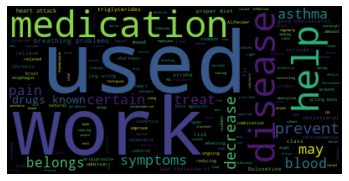


 2013 	
            brand_name total_spending coverage_type
61217           Nexium   2.52 Billion      medicare
59550    Advair Diskus   2.26 Billion      medicare
60098          Crestor   2.21 Billion      medicare
59503          Abilify   2.10 Billion      medicare
25342          Abilify   2.01 Billion      medicaid
61807          Spiriva   1.95 Billion      medicare
60118         Cymbalta   1.94 Billion      medicare
61169          Namenda   1.56 Billion      medicare
60774          Januvia   1.46 Billion      medicare
60850  Lantus Solostar   1.37 Billion      medicare


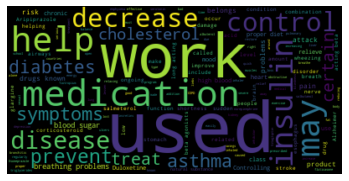


 2014 	
            brand_name total_spending coverage_type
64634          Sovaldi   3.10 Billion      medicare
64045           Nexium   2.65 Billion      medicare
62926          Crestor   2.54 Billion      medicare
62331          Abilify   2.52 Billion      medicare
28705          Abilify   2.46 Billion      medicaid
62378    Advair Diskus   2.27 Billion      medicare
64635          Spiriva   2.15 Billion      medicare
63678  Lantus Solostar   2.01 Billion      medicare
63602          Januvia   1.77 Billion      medicare
63677           Lantus   1.72 Billion      medicare


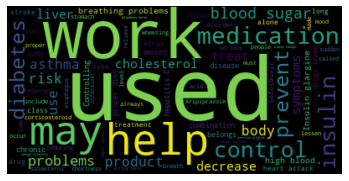


 2015 	
            brand_name total_spending coverage_type
66290          Harvoni   7.03 Billion      medicare
65754          Crestor   2.88 Billion      medicare
66506  Lantus Solostar   2.48 Billion      medicare
65206    Advair Diskus   2.27 Billion      medicare
33447          Harvoni   2.19 Billion      medicaid
67463          Spiriva   2.19 Billion      medicare
66430          Januvia   2.13 Billion      medicare
67329         Revlimid   2.07 Billion      medicare
32068          Abilify   2.03 Billion      medicaid
66873           Nexium   2.01 Billion      medicare


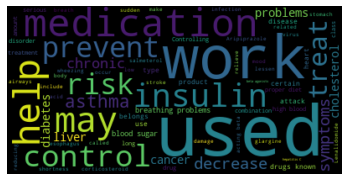


 2016 	
            brand_name total_spending coverage_type
69118          Harvoni   4.39 Billion      medicare
40170          Harvoni   4.39 Billion      medicare
70157         Revlimid   2.66 Billion      medicare
41476         Revlimid   2.66 Billion      medicare
69334  Lantus Solostar   2.52 Billion      medicare
40469  Lantus Solostar   2.52 Billion      medicare
69258          Januvia   2.44 Billion      medicare
40366          Januvia   2.44 Billion      medicare
68582          Crestor   2.32 Billion      medicare
39497          Crestor   2.32 Billion      medicare


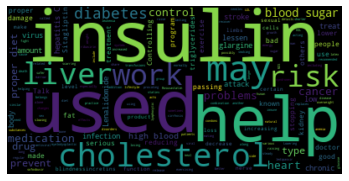


 2017 	
            brand_name total_spending coverage_type
45052         Revlimid   3.31 Billion      medicare
43369          Eliquis   3.07 Billion      medicare
43942          Januvia   2.78 Billion      medicare
44045  Lantus Solostar   2.63 Billion      medicare
45798          Xarelto   2.61 Billion      medicare
43746          Harvoni   2.55 Billion      medicare
44206           Lyrica   2.51 Billion      medicare
42428    Advair Diskus   2.37 Billion      medicare
43779       Humira Pen   2.01 Billion      medicare
45241          Spiriva   1.66 Billion      medicare


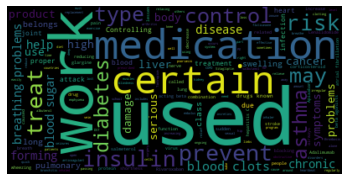


 2018 	
            brand_name total_spending coverage_type
46945          Eliquis   4.99 Billion      medicare
48628         Revlimid   4.06 Billion      medicare
49374          Xarelto   3.35 Billion      medicare
47518          Januvia   3.22 Billion      medicare
47782           Lyrica   2.95 Billion      medicare
46004    Advair Diskus   2.39 Billion      medicare
47355       Humira Pen   2.38 Billion      medicare
47621  Lantus Solostar   2.37 Billion      medicare
47413        Imbruvica   1.86 Billion      medicare
48893        Symbicort   1.75 Billion      medicare


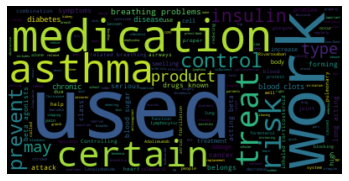


 2019 	
            brand_name total_spending coverage_type
50521          Eliquis   7.30 Billion      medicare
52204         Revlimid   4.67 Billion      medicare
52950          Xarelto   4.07 Billion      medicare
51094          Januvia   3.53 Billion      medicare
51197  Lantus Solostar   2.49 Billion      medicare
50989        Imbruvica   2.43 Billion      medicare
52723        Trulicity   2.27 Billion      medicare
51358           Lyrica   2.02 Billion      medicare
52469        Symbicort   2.01 Billion      medicare
51706  Novolog Flexpen   1.84 Billion      medicare


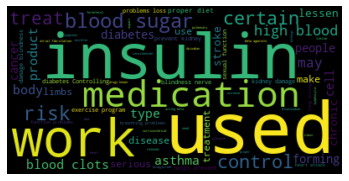


 2020 	
            brand_name total_spending coverage_type
54097          Eliquis   9.93 Billion      medicare
55780         Revlimid   5.35 Billion      medicare
56526          Xarelto   4.70 Billion      medicare
54670          Januvia   3.86 Billion      medicare
56299        Trulicity   3.28 Billion      medicare
54565        Imbruvica   2.96 Billion      medicare
54773  Lantus Solostar   2.66 Billion      medicare
54671        Jardiance   2.37 Billion      medicare
54512   Humira(Cf) Pen   2.16 Billion      medicare
54554          Ibrance   2.10 Billion      medicare


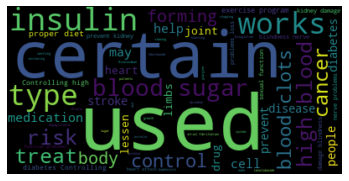

In [69]:
for year in years:
    print('\n', year, '\t')
    data_by_year = med[med['year']==year].copy()
    data_by_year.sort_values("total_spending", ascending=False, inplace=True)
    data_by_year['total_spending'] = data_by_year['total_spending'].astype(str).apply(
                                                            lambda x: x[0] + "."+ x[1:3] + " Billion")
    
    print(data_by_year[['brand_name', 'total_spending', 'coverage_type']].head(10))
    names = data_by_year["brand_name"].head(10).apply(lambda x: x.strip().lower()).unique()
    text = ''.join(drugs[drugs["Brand"].isin(names)].Uses)
    wc = WordCloud().generate(text)
    
    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")
    plt.show()

In [11]:
drugs.head()

,Brand,Generic,Uses
0,8hr arthritis pain,Acetaminophen,This drug is used to treat mild to moderate pa...
1,a & d,Vitamins A And D,This medication is used as a moisturizer to tr...
2,a & d diaper rash,"Dimethic/Zinc Ox/Vits A,D/Aloe",Drug uses not available
3,a-hydrocort,Hydrocortisone Sod Succinate,This medication is used to treat various condi...
4,a-methapred,Methylprednisolone Sod Succ,This medication is used to treat conditions su...


In [15]:
drugs.loc[:,'Uses'] = drugs.loc[:,'Uses'].apply(lambda x: np.nan if x == "Drug uses not available" else x)

In [61]:
med[med['brand_name'].str.contains('bilif')]

,brand_name,generic_name,number_of_manufacturers,total_spending,total_dosage_units,total_claims,average_spending_per_dosage_unit_(weighted),average_spending_per_claim,year,coverage_type
12,Abilify Maintena,Aripiprazole,1,1.988605e+08,118977.72,118352.0,1672.24,1680.25,2016,medicaid
13,Abilify Mycite,Aripiprazole,1,NaN,NaN,NaN,NaN,NaN,2016,medicaid
14,Abilify*,Aripiprazole,1,1.075466e+09,33937399.21,1109370.0,31.89,969.44,2016,medicaid
4407,Abilify Maintena,Aripiprazole,1,2.748124e+08,152756.81,150808.0,1797.63,1822.27,2017,medicaid
4408,Abilify Mycite,Aripiprazole,1,NaN,NaN,NaN,NaN,NaN,2017,medicaid
4409,Abilify*,Aripiprazole,1,5.817326e+08,18602107.10,579250.0,31.37,1004.29,2017,medicaid
8802,Abilify Maintena,Aripiprazole,1,3.636238e+08,189907.94,190192.0,1915.11,1911.88,2018,medicaid
8803,Abilify Mycite,Aripiprazole,1,NaN,NaN,NaN,NaN,NaN,2018,medicaid
8804,Abilify*,Aripiprazole,1,4.545696e+08,14501884.29,438931.0,31.47,1035.63,2018,medicaid
13197,Abilify Maintena,Aripiprazole,1,4.618415e+08,223946.29,223248.0,2068.34,2068.74,2019,medicaid


In [67]:
med.loc[:,"brand_name"] = med.loc[:,"brand_name"].apply(lambda x: x.strip("*").strip())

In [68]:
med.tail(20)

,brand_name,generic_name,number_of_manufacturers,total_spending,total_dosage_units,total_claims,average_spending_per_dosage_unit_(weighted),average_spending_per_claim,year,coverage_type
70790,Zosyn,Piperacillin Sodium/Tazobactam,1,2.505152e+04,29639.00,98.0,0.85,255.63,2016,medicare
70791,Zosyn,"Piperacillin-Tazo-Dextrose,Iso",1,1.814123e+06,4026912.00,6794.0,0.47,267.02,2016,medicare
70792,Zovia 1-35e,Ethynodiol D-Ethinyl Estradiol,1,5.859625e+04,85955.00,2027.0,0.68,28.91,2016,medicare
70793,Zovia 1-50e,Ethynodiol D-Ethinyl Estradiol,1,5.162719e+04,63616.00,1545.0,0.81,33.42,2016,medicare
70794,Zovirax,Acyclovir,2,2.060485e+07,207553.00,23745.0,127.67,867.76,2016,medicare
70795,Zubsolv,Buprenorphine HCl/Naloxone HCl,1,2.763016e+06,369098.00,8506.0,7.54,324.83,2016,medicare
70796,Zyban,Bupropion HCl,1,3.288628e+04,8324.00,128.0,3.95,256.92,2016,medicare
70797,Zyclara,Imiquimod,1,2.662782e+06,29259.63,2442.0,117.20,1090.41,2016,medicare
70798,Zydelig,Idelalisib,1,6.059216e+07,396324.00,6781.0,152.89,8935.58,2016,medicare
70799,Zyflo,Zileuton,1,3.943675e+06,149901.00,1223.0,26.31,3224.59,2016,medicare


In [72]:
med[med['total_spending']> 1e09].head(20)

,brand_name,generic_name,number_of_manufacturers,total_spending,total_dosage_units,total_claims,average_spending_per_dosage_unit_(weighted),average_spending_per_claim,year,coverage_type
14,Abilify,Aripiprazole,1,1.075466e+09,3.393740e+07,1109370.0,31.89,969.44,2016,medicaid
1760,Harvoni,Ledipasvir/Sofosbuvir,1,2.219622e+09,1.968169e+06,80706.0,1127.76,27502.56,2016,medicaid
6155,Harvoni,Ledipasvir/Sofosbuvir,1,1.217648e+09,1.120399e+06,44297.0,1086.80,27488.28,2017,medicaid
6204,Humira Pen,Adalimumab,1,1.294361e+09,5.980658e+05,260749.0,2164.24,4964.01,2017,medicaid
6555,Latuda,Lurasidone HCl,1,1.101863e+09,2.953942e+07,967808.0,37.39,1138.51,2017,medicaid
10599,Humira Pen,Adalimumab,1,1.391609e+09,6.241321e+05,267704.0,2229.67,5198.31,2018,medicaid
10950,Latuda,Lurasidone HCl,1,1.245974e+09,3.072283e+07,1005565.0,40.65,1239.08,2018,medicaid
11146,Mavyret,Glecaprevir/Pibrentasvir,1,1.024867e+09,5.191383e+06,90808.0,197.42,11286.09,2018,medicaid
12995,Vyvanse,Lisdexamfetamine Dimesylate,1,1.019919e+09,1.076639e+08,3592951.0,9.47,283.87,2018,medicaid
13649,Biktarvy,Bictegrav/Emtricit/Tenofov Ala,1,1.101746e+09,1.098604e+07,358647.0,100.29,3071.95,2019,medicaid
